In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
df = pd.read_csv('fake_bills.csv',sep=';')

In [271]:
bill_data_copy.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,False,True,is_genuine
0,171.81,104.86,104.95,4.52,2.89,112.83,0,1,True
1,171.46,103.36,103.66,3.77,2.99,113.09,0,1,True
2,172.69,104.48,103.50,4.40,2.94,113.16,0,1,True
3,171.36,103.91,103.94,3.62,3.01,113.51,0,1,True
4,171.73,104.28,103.46,4.04,3.48,112.54,0,1,True


In [129]:
df.columns.tolist()

['diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length',
 False,
 True,
 'is_genuine']

In [62]:
df.drop('is_genuine',axis=1,inplace=True)

In [64]:
df=pd.concat([df,first_c],axis=1)

In [67]:
encoded = pd.get_dummies(df['is_genuine'])

In [86]:
df=pd.concat([df,first_c],axis=1)

In [84]:
df.drop('is_genuine',axis=1,inplace=True)

In [87]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      1500 non-null   float64
 1   height_left   1500 non-null   float64
 2   height_right  1500 non-null   float64
 3   margin_low    1463 non-null   float64
 4   margin_up     1500 non-null   float64
 5   length        1500 non-null   float64
 6   False         1500 non-null   uint8  
 7   True          1500 non-null   uint8  
 8   is_genuine    1500 non-null   bool   
dtypes: bool(1), float64(6), uint8(2)
memory usage: 74.8 KB


In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44
False,1500.0,0.333333,0.471562,0.00,0.000,0.00,1.00,1.00
True,1500.0,0.666667,0.471562,0.00,0.000,1.00,1.00,1.00


In [104]:
df.iloc[:, 6:8] = df.iloc[:, 6:8].astype('int64')

C:\Users\manoj\AppData\Local\Temp\ipykernel_7040\1257972782.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 6:8] = df.iloc[:, 6:8].astype('int64')


In [107]:
bill_data_copy = df.copy(deep = True)

In [108]:
df.isnull().sum()

diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
False            0
True             0
is_genuine       0
dtype: int64

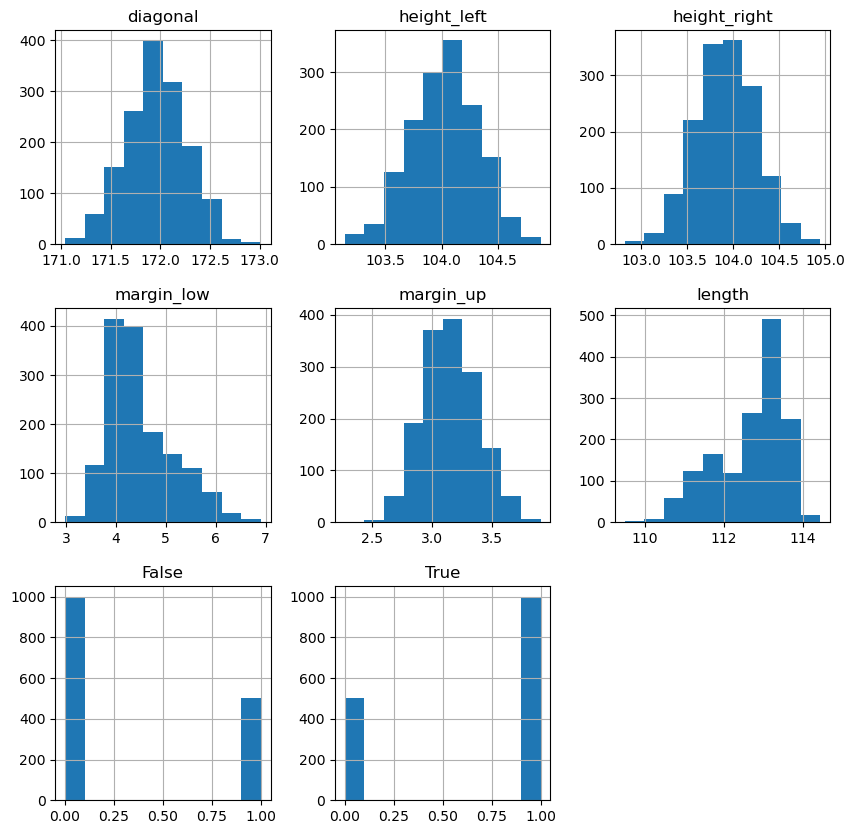

In [109]:
p = bill_data_copy.hist(figsize=(10,10))

In [110]:
bill_data_copy['margin_low'].fillna(bill_data_copy['margin_low'].mean(),inplace=True)

Text(0, 0.5, 'Count of data type')

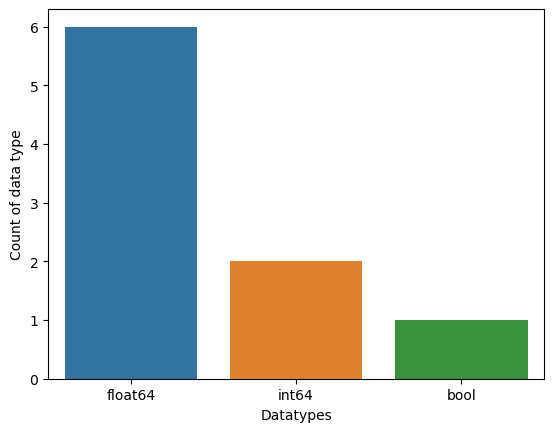

In [111]:
sns.countplot(x=bill_data_copy.dtypes,data = bill_data_copy)
plt.xlabel('Datatypes')
plt.ylabel('Count of data type')

In [112]:
bill_data_copy.shape

(1500, 9)

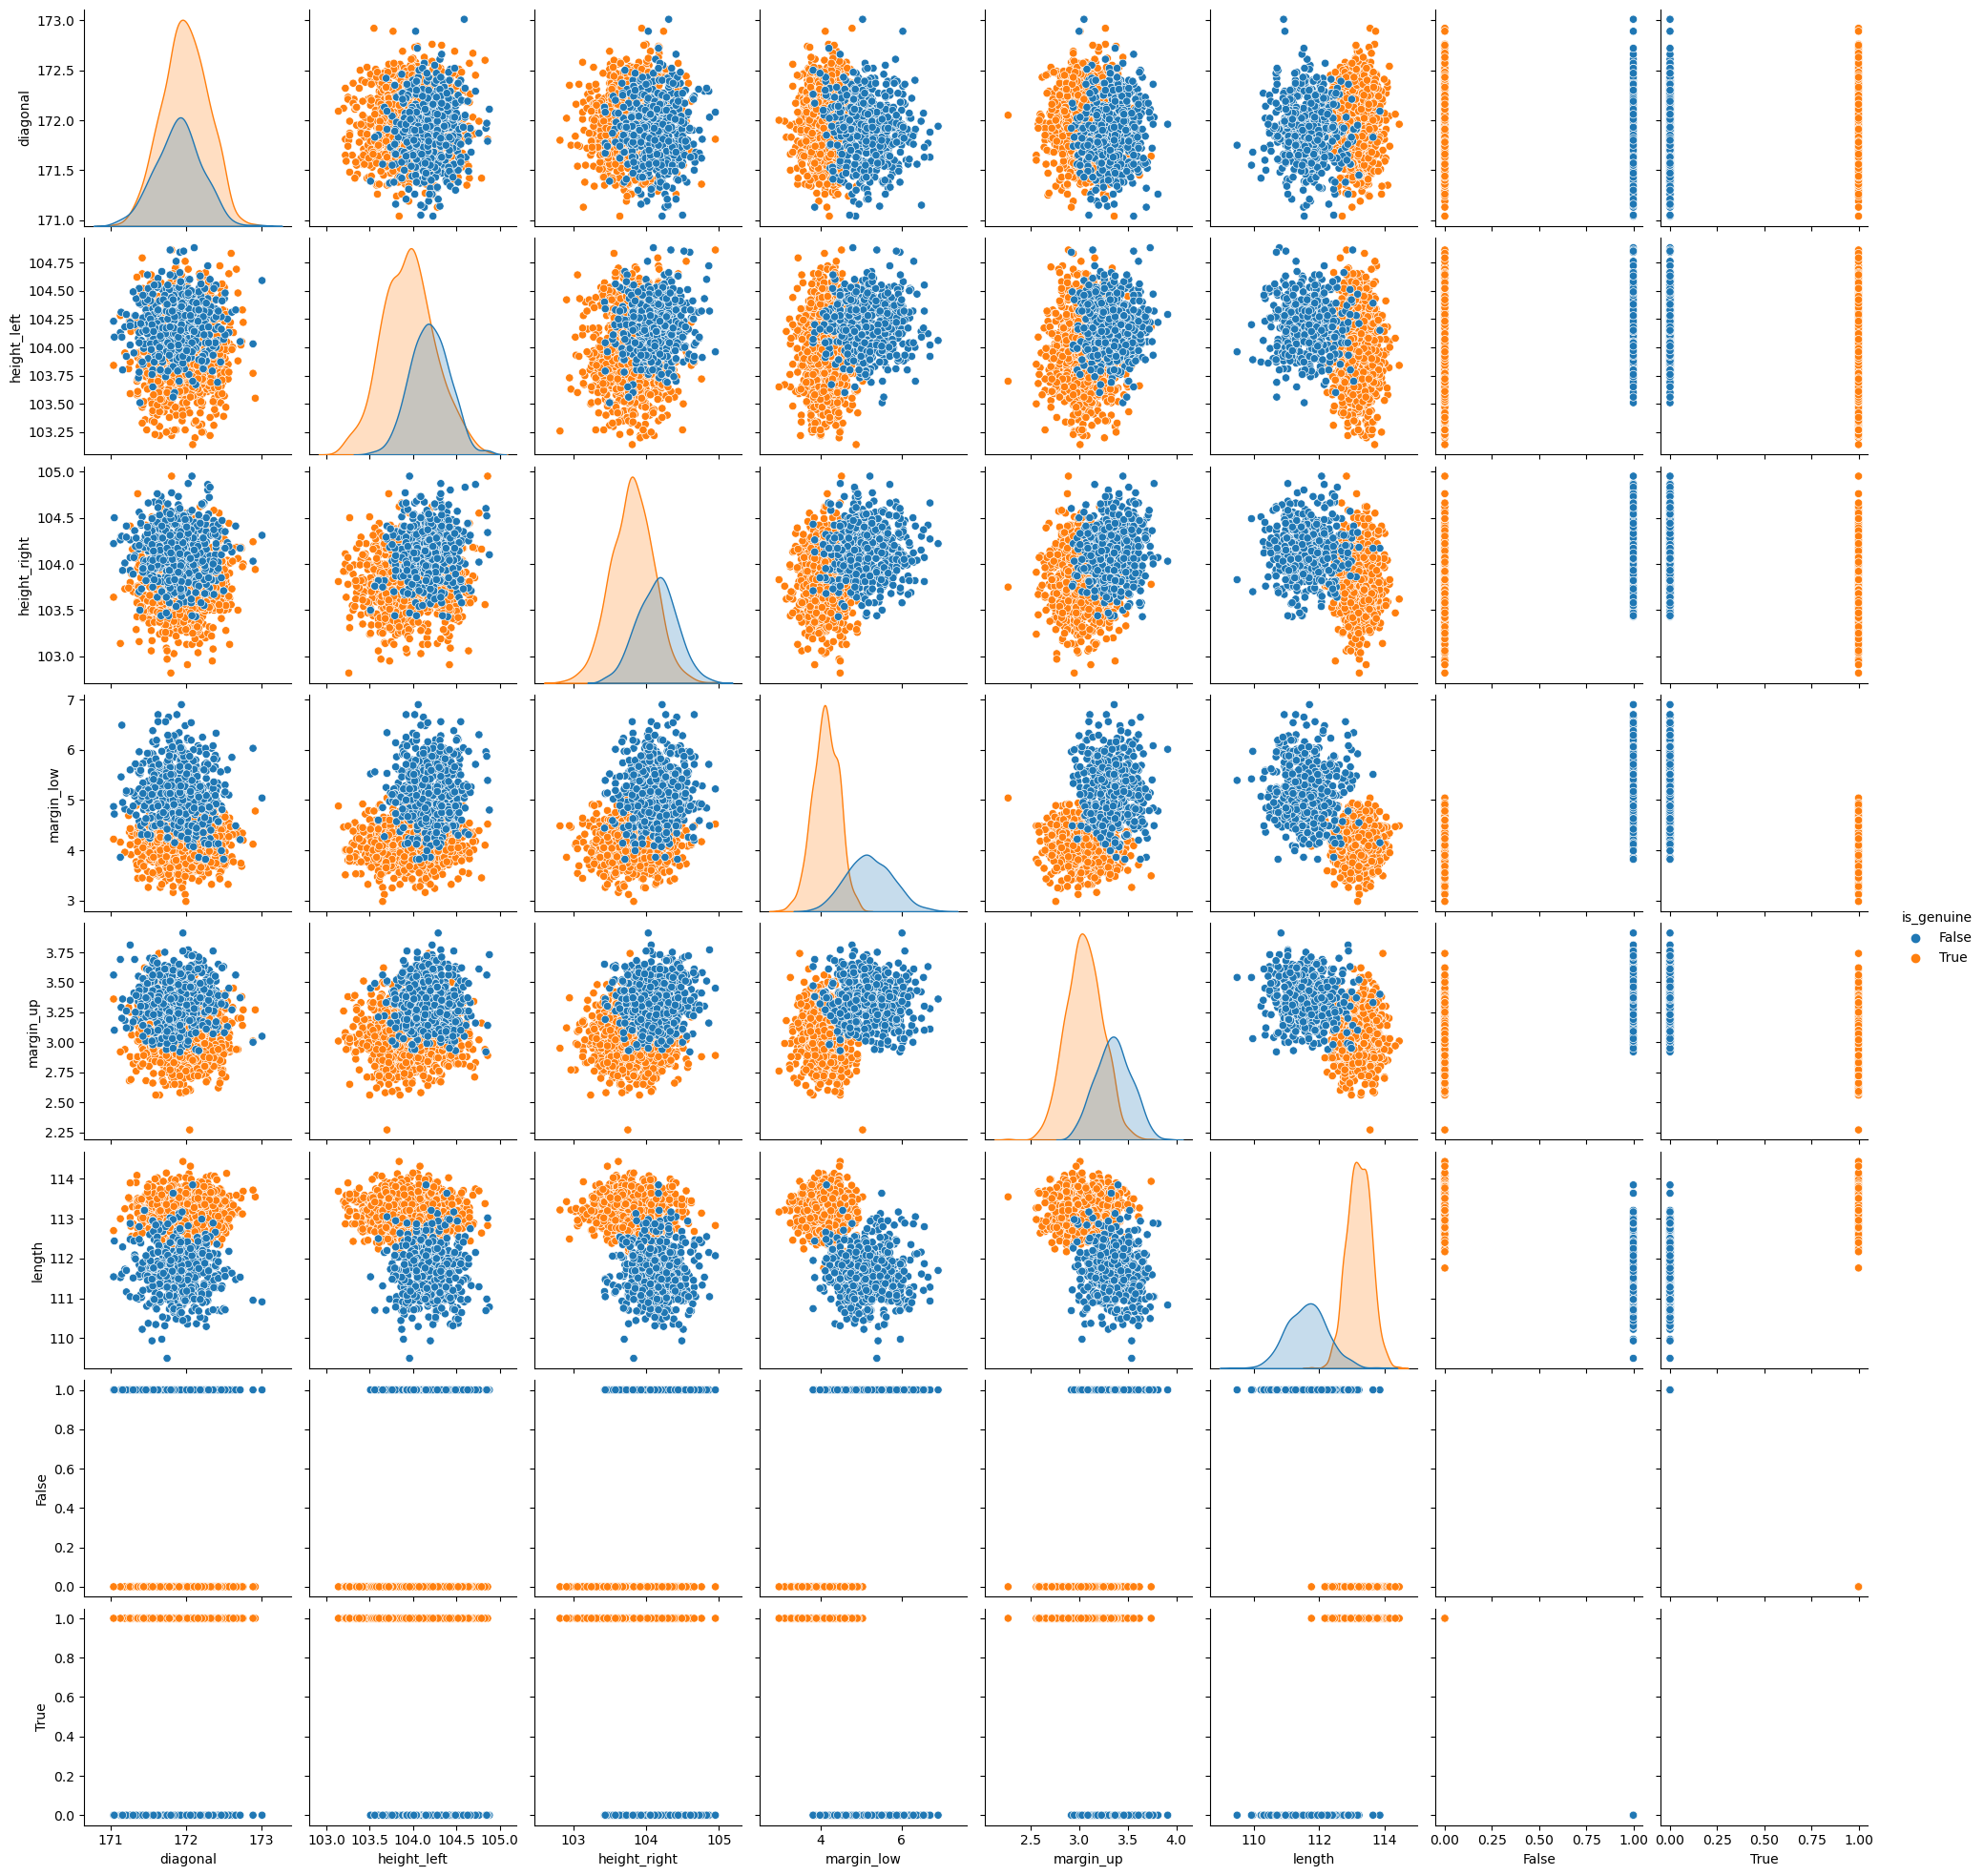

In [113]:
sns.pairplot(bill_data_copy,hue='is_genuine')

<Axes: >

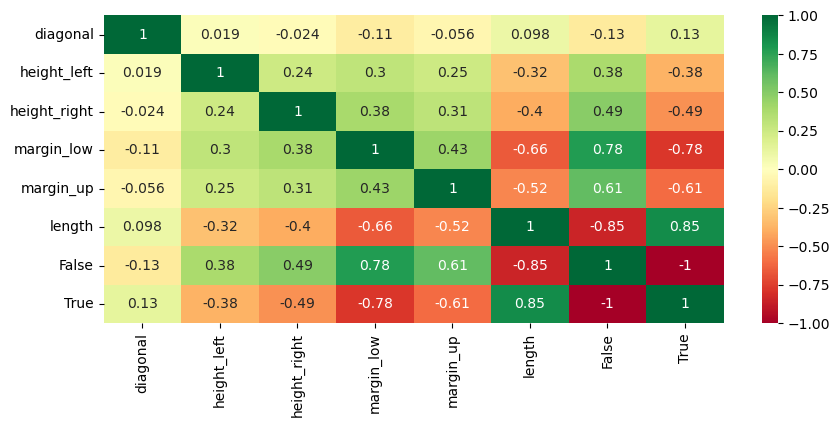

In [124]:
plt.figure(figsize=(10,4))
sns.heatmap(bill_data_copy.iloc[:,0:8].corr(),annot=True,cmap='RdYlGn')

In [173]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df2 = pd.DataFrame(scale.fit_transform(X.iloc[:,0:6]),columns=['diagonal','height_left','height_right','margin_low','margin_up','length'])

In [155]:
df = df.columns.astype(str)

In [162]:
X= bill_data_copy.rename(str,axis="columns")

<Axes: >

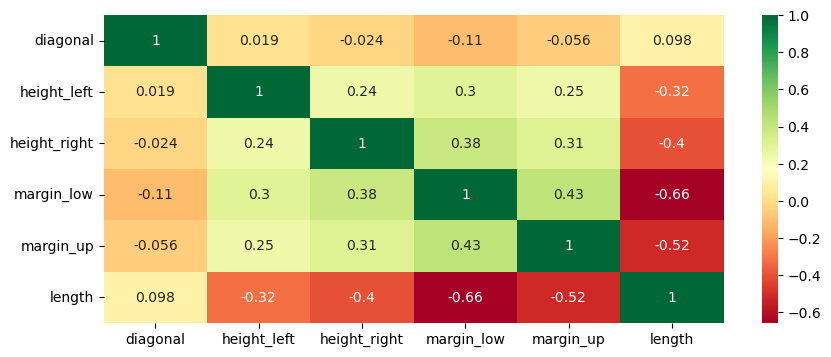

In [174]:
plt.figure(figsize=(10,4))
sns.heatmap(df2.iloc[:,0:6].corr(),annot=True,cmap='RdYlGn')

In [178]:
X = df2.iloc[:,0:6]
y = bill_data_copy.is_genuine

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [201]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,50):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))


In [202]:
test_scores

[0.9911111111111112,
 0.9933333333333333,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9977777777777778,
 0.9933333333333333,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9977777777777778,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9977777777777778,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9977777777777778,
 0.9977777777777778,
 0.9955555555555555,
 0.9977777777777778,
 0.9977777777777778,
 0.9977777777777778,
 0.9977777777777778,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9977777777777778,
 0.9955555555555555,
 1.0,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9977777777777778,
 0.9955555555555555,
 0.9955555555555555,
 0.9955555555555555,
 0.9977777777777778,
 0.9955

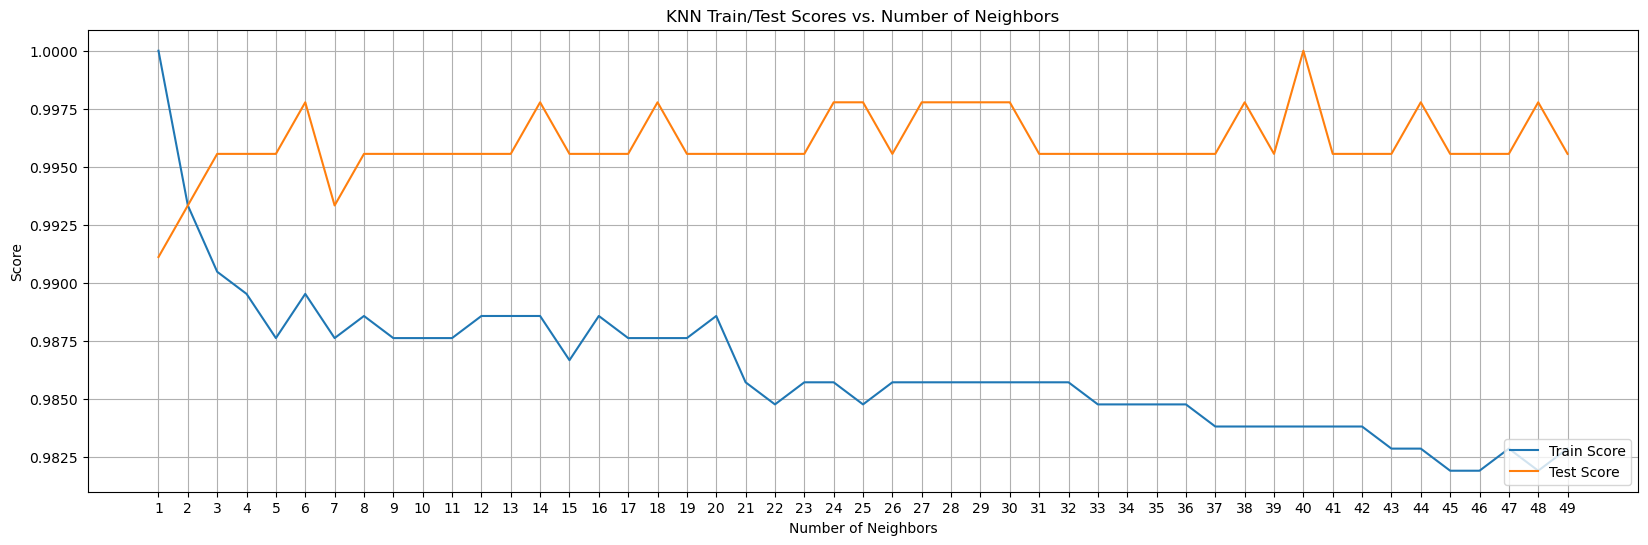

In [265]:
neighbors = range(1, 50)

# Create a DataFrame to hold the data
data = pd.DataFrame({'Neighbors': neighbors, 'Train Score': train_scores, 'Test Score': test_scores})

# Melt the DataFrame to plot both train and test scores in the same plot
melted_data = pd.melt(data, id_vars=['Neighbors'], value_vars=['Train Score', 'Test Score'],
                      var_name='Dataset', value_name='Score')

# Plot using Seaborn
plt.figure(figsize=(20, 6))
sns.lineplot(x='Neighbors', y='Score', hue='Dataset', data=melted_data)
plt.title('KNN Train/Test Scores vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.xticks(neighbors)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [189]:
print(melted_data)

    Neighbors      Dataset     Score
0           1  Train Score  1.000000
1           2  Train Score  0.993333
2           3  Train Score  0.990476
3           4  Train Score  0.989524
4           5  Train Score  0.987619
5           6  Train Score  0.989524
6           7  Train Score  0.987619
7           8  Train Score  0.988571
8           9  Train Score  0.987619
9          10  Train Score  0.987619
10         11  Train Score  0.987619
11         12  Train Score  0.988571
12         13  Train Score  0.988571
13         14  Train Score  0.988571
14          1   Test Score  0.991111
15          2   Test Score  0.993333
16          3   Test Score  0.995556
17          4   Test Score  0.995556
18          5   Test Score  0.995556
19          6   Test Score  0.997778
20          7   Test Score  0.993333
21          8   Test Score  0.995556
22          9   Test Score  0.995556
23         10   Test Score  0.995556
24         11   Test Score  0.995556
25         12   Test Score  0.995556
2

In [266]:
knn = KNeighborsClassifier(40)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

1.0

In [267]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,150,0,150
True,0,300,300
All,150,300,450


Text(0.5, 23.52222222222222, 'Predicted label')

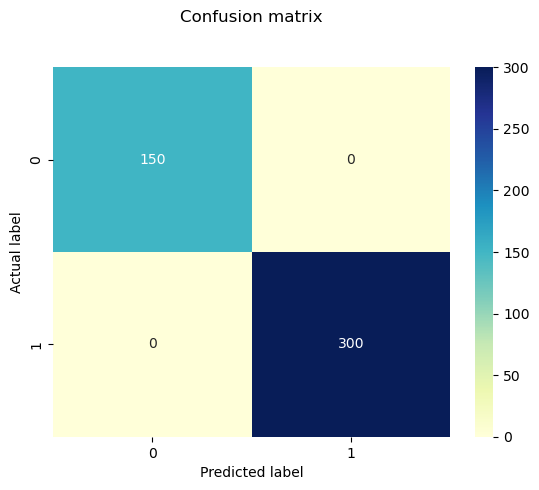

In [211]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [260]:
knn.predict(X_test.iloc[1:2,:])

array([ True])

In [241]:
X_test.iloc[1:2,:]

,diagonal,height_left,height_right,margin_low,margin_up,length
727,0.300105,-1.033977,-0.338864,-0.421099,-0.783104,1.067697


In [240]:
y_test

1469    False
727      True
1474    False
774      True
455      True
        ...  
92       True
1044    False
1279    False
1253    False
743      True
Name: is_genuine, Length: 450, dtype: bool